## Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

**Instructions:**

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.
  
**Resources:**
- Download the following datasets: earthquakes-1.csv, fb_stock_prices_2018.csv

**Procedures:**
- 9.1 Introduction to Matplotlib
- 9.2 Plotting with Pandas
- 9.3 Pandas Plotting Subpackage

**Data Analysis:**
- Provide comments on output from the procedures above.
  
**Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:
1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.
3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.
4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single 
line
5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
   - The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
   - The second subplot will be a bar plot showing the net effect this had monthly, using resample().
   - Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
   - Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the facebook stock price data
fb_stocks = pd.read_csv('Downloads/fb_stock_prices_2018.csv')
fb_stocks['date'] = pd.to_datetime(fb_stocks['date'])
fb_stocks.set_index('date', inplace=True)

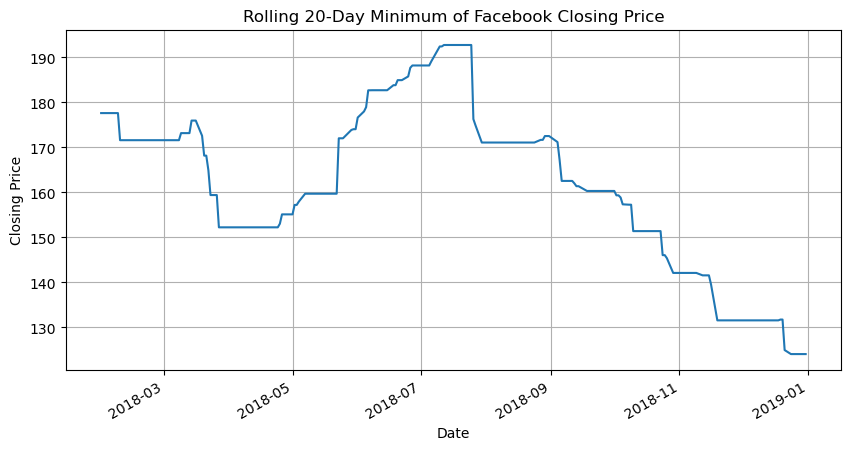

In [7]:
# 1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
plt.figure(figsize=(10,5))
fb_stocks['close'].rolling(window=20).min().plot()
plt.title('Rolling 20-Day Minimum of Facebook Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


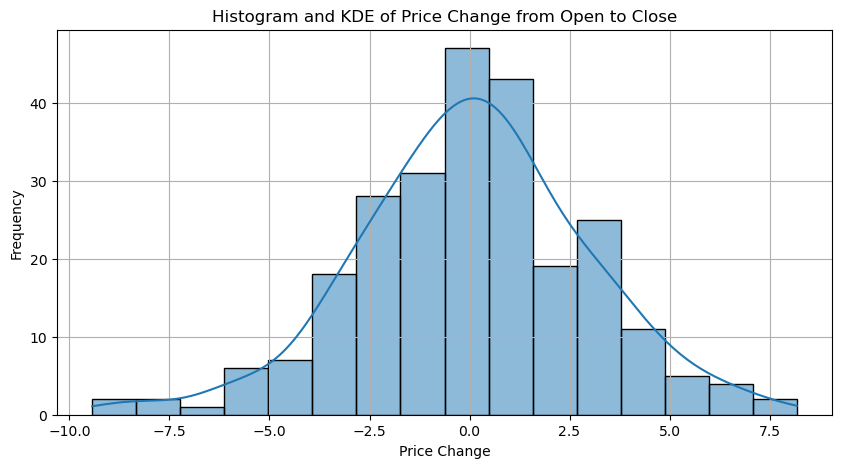

In [13]:
# 2. Create a histogram and KDE of the change from open to close in the price of Facebook stock
plt.figure(figsize=(10, 5))
sns.histplot(fb_stocks['close'] - fb_stocks['open'], kde=True)
plt.title('Histogram and KDE of Price Change from Open to Close')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
# Load the earthquake dataframe
eq = pd.read_csv('Documents/Python/earthquakes.csv')

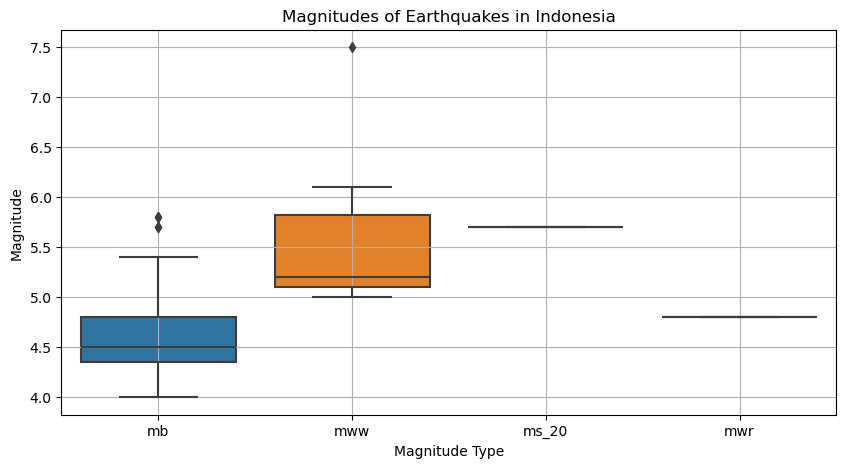

In [16]:
# 3. Create box plots for the magnitudes of each magType used in Indonesia
indo_magType = eq[eq['parsed_place'] == 'Indonesia']
plt.figure(figsize=(10, 5))
sns.boxplot(x='magType', y='mag', data=indo_magType)
plt.title('Magnitudes of Earthquakes in Indonesia')
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


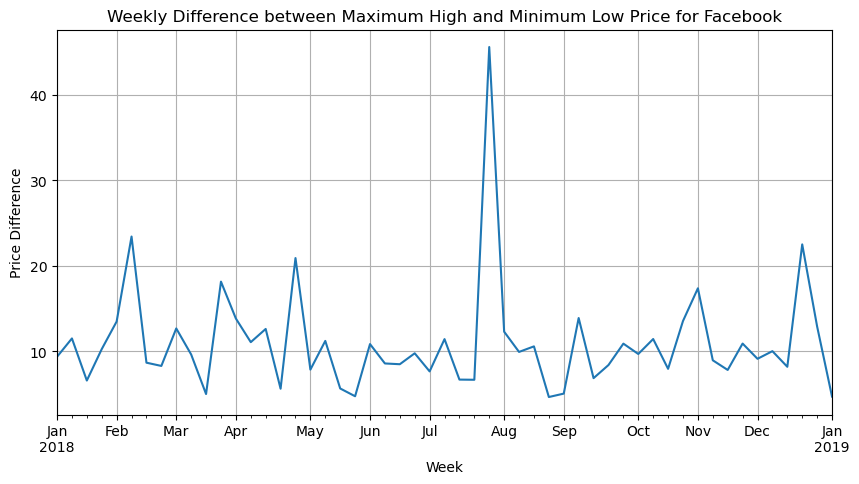

In [18]:
# 4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook
weekly_price = fb_stocks.resample('W').agg({
    'high' : 'max',
    'low' : 'min',
})
weekly_price['price_diff'] = weekly_price['high'] - weekly_price['low']
plt.figure(figsize=(10,5))
weekly_price['price_diff'].plot()
plt.title('Weekly Difference between Maximum High and Minimum Low Price for Facebook')
plt.xlabel('Week')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()


In [19]:
# 5. Create two subplots side-by-side showing the effect of after-hours trading on Facebook's stock price
fb_stocks['prior_day_close'] = fb_stocks['close'].shift(1)
fb_stocks['after_hours_effect'] = fb_stocks['open'] - fb_stocks['prior_day_close']

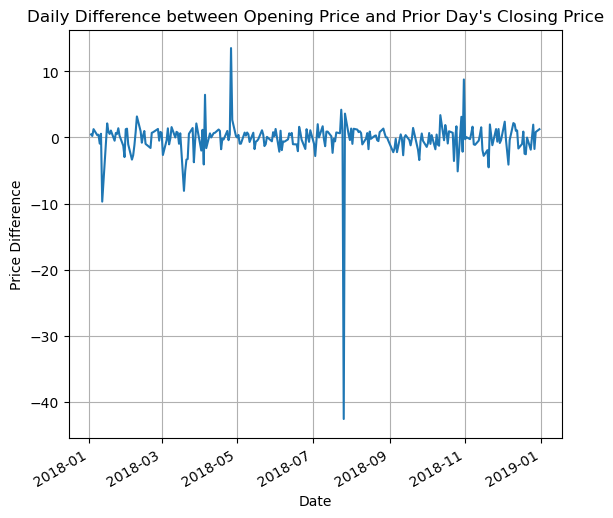

In [21]:
# Bonus 1
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
fb_stocks['after_hours_effect'].plot()
plt.title('Daily Difference between Opening Price and Prior Day\'s Closing Price')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)

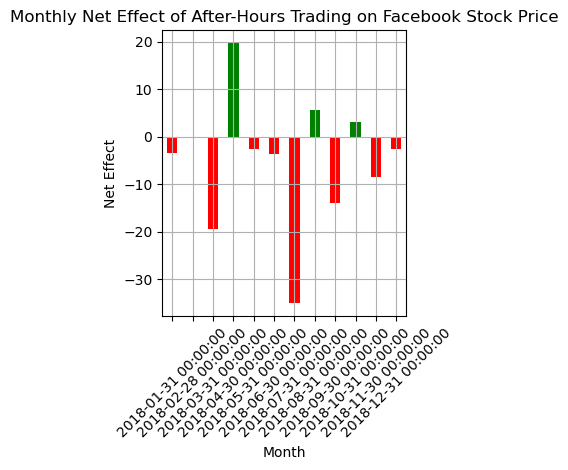

In [22]:
# Bonus 2
monthly_net = fb_stocks.resample('M').sum()['after_hours_effect']
plt.subplot(1, 2, 2)
monthly_net.plot(kind='bar', color=(monthly_net> 0).map({True: 'g', False: 'r'}))
plt.title('Monthly Net Effect of After-Hours Trading on Facebook Stock Price')
plt.xlabel('Month')
plt.ylabel('Net Effect')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary and Conclusions

This hands-on activity enables us to apply the use of matplotlib and pandas in handling real-time datas such as the fb stocks prices and earthquakes in indonesia. This helps us to view the data in different types of graphs and plotting depends on what data you want to find. By using matplotlib, we can also learn how to read data patterns, distributions and anomalies. 

This activity highlighted how the library matplotlib in Python is widely used in the field of data science and analytics due to its versatility and its customizability